In [3]:
#Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Load the dataset
loadData = pd.read_csv("Downloads/X_Litmus/Logit.csv")

In [9]:
loadData.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [10]:
#Missing data analysis
loadData.isnull().sum()

User ID             0
Gender              0
Age                18
EstimatedSalary    17
Purchased           0
dtype: int64

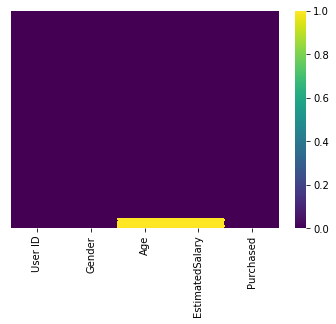

In [13]:
sns.heatmap(loadData.isnull(), yticklabels = False, cmap = 'viridis')

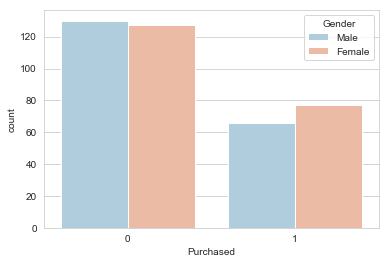

In [16]:
sns.set_style('whitegrid')
sns.countplot(x = 'Purchased' , hue = 'Gender', data = loadData, palette = 'RdBu_r')

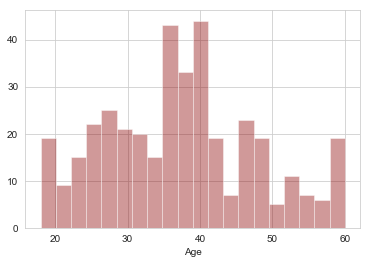

In [23]:
sns.distplot(loadData['Age'].dropna(), kde = False, color = 'darkred', bins =20)

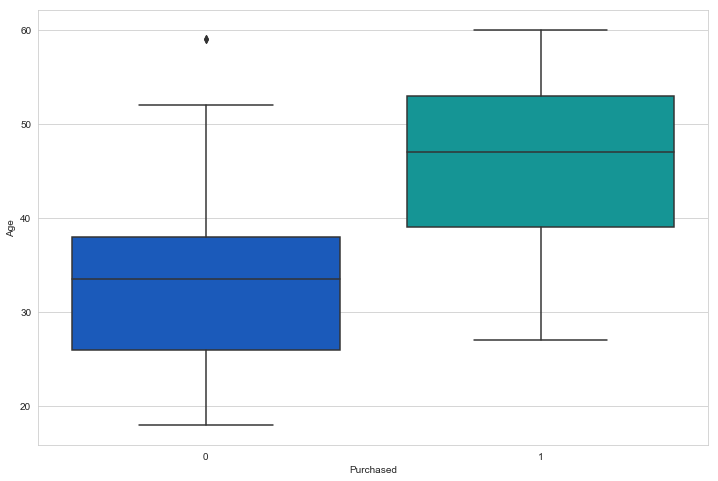

In [24]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Purchased', y = 'Age', data = loadData, palette = 'winter')

In [25]:
def impute_age(cols):
    Age = cols[0]
    Purchased = cols[1]
    if pd.isnull(Age):
        if Purchased == 0:
            return 34
        elif Purchased == 1: 
            return 48
    else:
        return Age

In [26]:
loadData['Age'] = loadData[['Age','Purchased']].apply(impute_age,axis = 1)

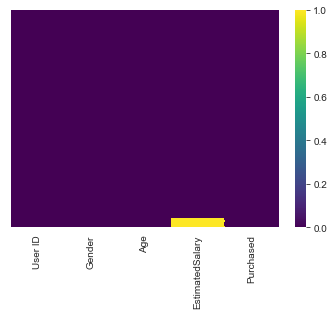

In [27]:
sns.heatmap(loadData.isnull(), yticklabels = False,cmap = 'viridis' )

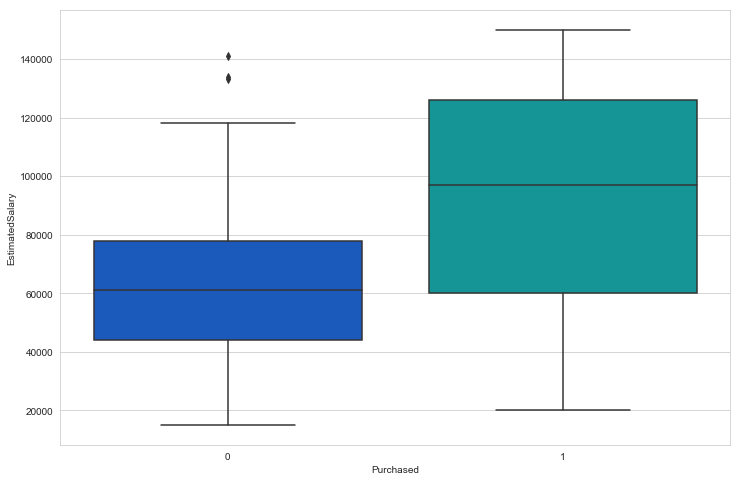

In [28]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = loadData, palette = 'winter')

In [31]:
def impute_es(cols):
    EstimatedSalary  = cols[0]
    Purchased = cols[1]
    if pd.isnull(EstimatedSalary):
        if Purchased == 0:
            return 61000
        elif Purchased == 1: 
            return 980000
    else:
        return EstimatedSalary

In [32]:
loadData['EstimatedSalary'] = loadData[['EstimatedSalary','Purchased']].apply(impute_es,axis = 1)

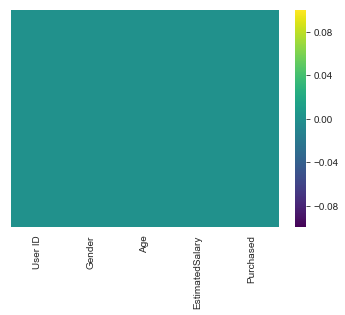

In [33]:
sns.heatmap(loadData.isnull(), yticklabels = False, cmap = 'viridis')

In [36]:
#Handling Categorical Variables 
Gender = pd.get_dummies(loadData['Gender'],drop_first = True).head()

In [37]:
loadData.drop(['Gender'], axis = 1, inplace = True)

In [38]:
loadData.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19.0,19000.0,0
1,15810944,35.0,20000.0,0
2,15668575,26.0,43000.0,0
3,15603246,27.0,57000.0,0
4,15804002,19.0,76000.0,0


In [40]:
loadData = pd.concat((loadData, Gender), axis = 1)

In [41]:
loadData.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19.0,19000.0,0,1.0
1,15810944,35.0,20000.0,0,1.0
2,15668575,26.0,43000.0,0,0.0
3,15603246,27.0,57000.0,0,0.0
4,15804002,19.0,76000.0,0,1.0


In [50]:
#Spliting the Dataset
X = loadData.drop('Purchased',axis = 1)

In [51]:
X.head()
X.shape

(400, 4)

In [52]:
y = loadData['Purchased']

In [53]:
y.head()
y.shape

(400,)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [60]:
X_train.isnull().sum()

User ID              0
Age                  0
EstimatedSalary      0
Male               316
dtype: int64

In [68]:
X_train['Male'] = X_train['Male'].fillna(X_train['Male'].mode()[0])
X_test['Male'] = X_test['Male'].fillna(X_test['Male'].mode()[0])

/Users/punchh_gourav/Documents/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/punchh_gourav/Documents/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
from sklearn.linear_model import LogisticRegression
logitModel = LogisticRegression()

In [70]:
logitModel.fit(X_train,y_train)

/Users/punchh_gourav/Documents/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
logitModelPred = logitModel.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [78]:
cm = confusion_matrix(y_test,logitModelPred)
accuracy = accuracy_score(y_test,logitModelPred)

In [79]:
print(accuracy)

0.8625
